In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
import cv2
import glob
import re

## Check train data

In [22]:
data_root = "/workspace/data"
data_list = [p for p in glob.glob(os.path.join(data_root, "raw", "PV01", "*", "*")) if re.search('^(?!.*label).*$', p)]
anno_list = [p for p in glob.glob(os.path.join(data_root, "raw", "PV01", "*", "*")) if re.search('^(?=.*label).*$', p)]

In [23]:
len(data_list), len(anno_list)

(645, 645)

In [24]:
data_list.sort()
anno_list.sort()

In [25]:
data_save_dir = "/workspace/data/processed/img"
anno_save_dir = "/workspace/data/processed/annotation"

os.makedirs(data_save_dir, exist_ok=True)
os.makedirs(anno_save_dir, exist_ok=True)

In [37]:
for img, anno in zip(data_list, anno_list):
    img_stem = os.path.basename(img)
    img_src = cv2.imread(img)
    img_dst = cv2.resize(img_src, (512, 512))
    cv2.imwrite(os.path.join(data_save_dir, img_stem), img_dst)
    
    anno_src = cv2.imread(anno)
    anno_dst = cv2.resize(anno_src, (512, 512))
    anno_dst = cv2.cvtColor(anno_dst, cv2.COLOR_BGR2GRAY)
    anno_dst = np.where(anno_dst != 0, 1, 0)
    cv2.imwrite(os.path.join(anno_save_dir, img_stem), anno_dst)

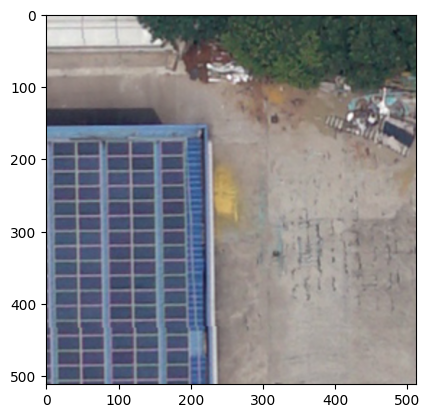

In [38]:
src = cv2.imread(os.path.join(data_save_dir, img_stem))
dst = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

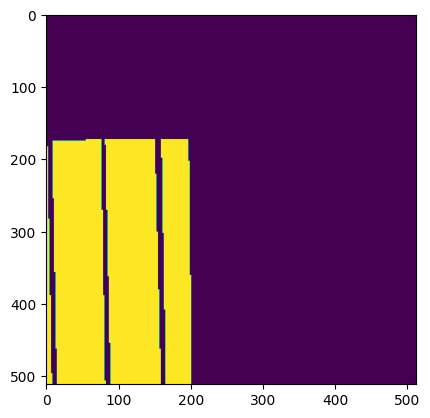

In [41]:
src = cv2.imread(os.path.join(anno_save_dir, img_stem))
dst = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
plt.imshow(dst)

In [42]:
dst.max()

1